In [1]:
import pandas as pd # 데이터 처리 모듈
import matplotlib.pyplot as plt # 데이터 시각화 모듈
import seaborn as sns # 데이터 시각화 모듈
from sklearn.model_selection import train_test_split # 데이터 분할 모듈

from sklearn.tree import DecisionTreeRegressor #회귀 학습(결정 나무)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

def show_files():
    import os
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
        
show_files()

/kaggle/input/plant-diary-new/plant_diary_new.csv


In [3]:
#CSV 파일 읽어오기
#pd 안에 database 저

#1
data_f = pd.read_csv('../input/plant-diary-new/plant_diary_new.csv')

#2
# read_csv() or
# def load_csv():
#     data_f = pd.read_csv('../input/plant-diary-new/plant_diary_new.csv')

#3
# def load_csv():
#     data_f = pd.read_csv('../input/plant-diary-new/plant_diary_new.csv')
#     return data_f

#4
# def load_csv(file_name):
#     data_f = pd.read_csv(file_name)
#     return data_f

#2
# load_csv()
#3 지정 불가능
# df = load_csv() # 함수 추상화하여 만듬
#4 어떤 파일을 로드할지 지정할 수 있다
# df = load_csv('../input/plant-diary-new/plant_diary_new.csv')

In [4]:
data_f
#3, 4
# df
# print(data_f)

,day,height,leaf_width,leaf_length,owner
0,1,0.0,0.0,0,1
1,1,0.0,0.0,0,2
2,1,0.0,0.0,0,3
3,5,16.0,2.8,9,1
4,5,16.0,2.8,9,2
5,5,12.0,2.9,8,3
6,7,33.0,4.5,15,1
7,7,26.0,3.8,14,2
8,7,25.0,4.5,13,3
9,10,35.0,5.0,18,1


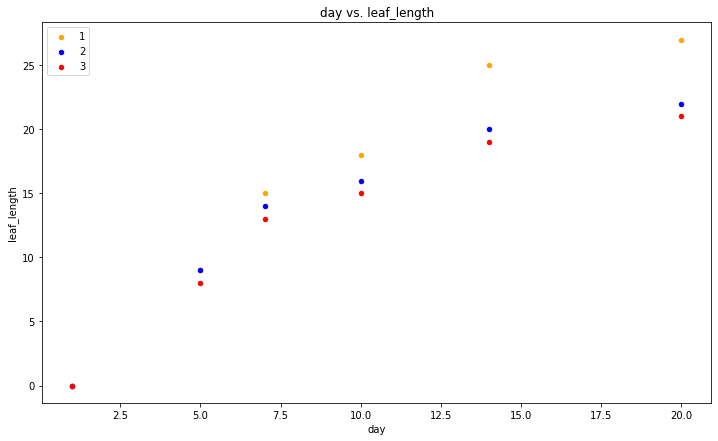

In [5]:
# 읽어온 데이터 표시하기

# cl = data_f['owner'].unique()

# col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

# fig = data_f[data_f['owner'] == cl[0]].plot(kind='scatter', x='day', y='leaf_width', color=col[0], label=cl[0])

# for i in range(len(cl)-1):
#     data_f[data_f['owner'] == cl[i+1]].plot(kind='scatter', x='day', y='leaf_width', color=col[i+1], label=cl[i+1], ax=fig)

# fig.set_xlabel('day')
# fig.set_ylabel('leaf_width')
# fig.set_title('day' + " vs. " + 'leaf_width')
# fig=plt.gcf()
# fig.set_size_inches(12, 7)
# plt.show()

#2
# def plot(df, a, b, c):
#     cl = data_f['owner'].unique()

#     col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

#     fig = data_f[data_f['owner'] == cl[0]].plot(kind='scatter', x='day', y='leaf_width', color=col[0], label=cl[0])

#     for i in range(len(cl)-1):
#         data_f[data_f['owner'] == cl[i+1]].plot(kind='scatter', x='day', y='leaf_width', color=col[i+1], label=cl[i+1], ax=fig)

#     fig.set_xlabel('day')
#     fig.set_ylabel('leaf_width')
#     fig.set_title('day' + " vs. " + 'leaf_width')
#     fig=plt.gcf()
#     fig.set_size_inches(12, 7)
#     plt.show()
    
# plot(data_f, 'day', 'leaf_width', 'owner')#(데이터, x축, y축, )

#3
def plot(df, a, b, c):
    cl = data_f[c].unique()

    col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

    fig = data_f[data_f[c] == cl[0]].plot(kind='scatter', x=a, y=b, color=col[0], label=cl[0])

    for i in range(len(cl)-1):
        data_f[data_f[c] == cl[i+1]].plot(kind='scatter', x=a, y=b, color=col[i+1], label=cl[i+1], ax=fig)

    fig.set_xlabel(a)
    fig.set_ylabel(b)
    fig.set_title(a + " vs. " + b)
    fig=plt.gcf()
    fig.set_size_inches(12, 7)
    plt.show()
    
    
#1   
# plot(data_f, 'day', 'leaf_width', 'owner')#(데이터, x축, y축, )
#2, 3
plot(data_f, 'day', 'leaf_length', 'owner')#(데이터, x축, y축, )

# plot(data_f, 'leaf_width', 'leaf_length', 'owner') #다른 데이터 표시

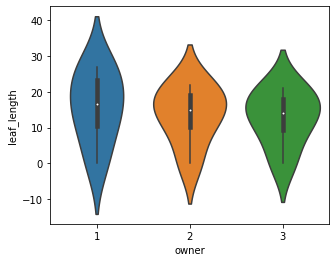

In [6]:
# 읽어온 데이터 표시하기
#1
# plt.figure(figsize=(5,4))
# plt.subplot(1,1,1)
# sns.violinplot(x='owner',y='leaf_length',data=data_f)

#2
def violin_plot(df, a, b):
    plt.figure(figsize=(5, 4))
    plt.subplot(1, 1, 1)
    sns.violinplot(x='owner', y='leaf_length', data=df)
    
violin_plot(data_f, 'owner', 'leaf_length') #첫 번째 파라미터에 데이터 주고, 2번 째 파라미터에 x축, y축은 세번째 파라미터

#첫 번째 식물의 길이가 20정도되는것이 많고 -10~ 40의 범위를 가진다

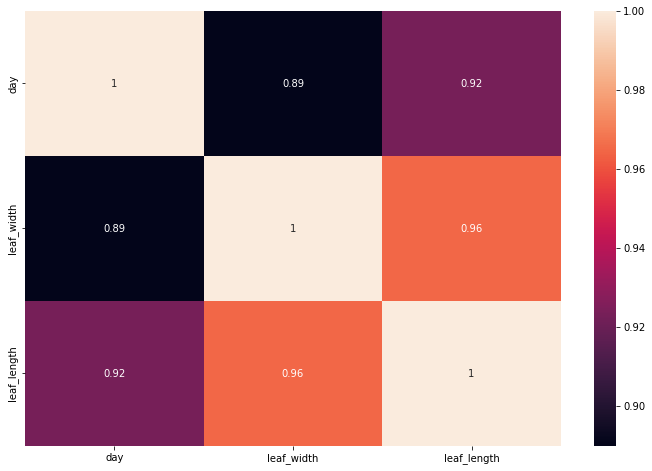

In [7]:
#1
# plt.figure(figsize=(12, 8))
# sns.heatmap(data_f[['day', 'height', 'leaf_width', 'leaf_length', 'owner']].corr(),annot=True)

def show_heatmap(df, a):
    plt.figure(figsize=(12,8))
    sns.heatmap(df[a].corr(),annot=True)
    
# show_heatmap(data_f, ['day', 'height', 'leaf_width', 'leaf_length', 'owner'])  
show_heatmap(data_f, ['day', 'leaf_width', 'leaf_length']) 

#show_heatmap 모듈 기억하기

#히트맵은 상관 관계

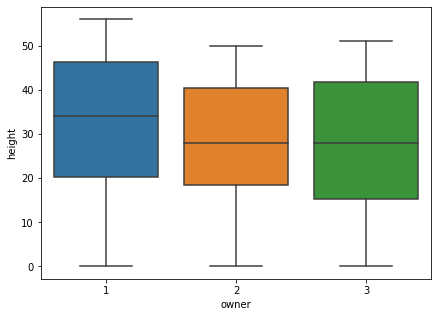

In [8]:
#1
# f, sub = plt.subplots(1, 1, figsize=(7, 5))
# sns.boxplot(x=data_f['owner'], y=data_f['height'], ax = sub)
# sub.set(xlabel='owner', ylabel = 'height');

#2
# def box_plot():
#     f, sub = plt.subplots(1, 1, figsize=(7, 5))
#     sns.boxplot(x=data_f['owner'], y=data_f['height'], ax = sub)
#     sub.set(xlabel='owner', ylabel = 'height');
    
# box_plot()

#3
def box_plot(df, a, b):
    f, sub = plt.subplots(1, 1, figsize=(7, 5))
    sns.boxplot(x=df[a], y=df[b], ax = sub)
    sub.set(xlabel=a, ylabel = b);
    
box_plot(data_f, 'owner', 'height')


#최소, 최대를 나타내며(이상치) 20에서 45의 범위를 가진다

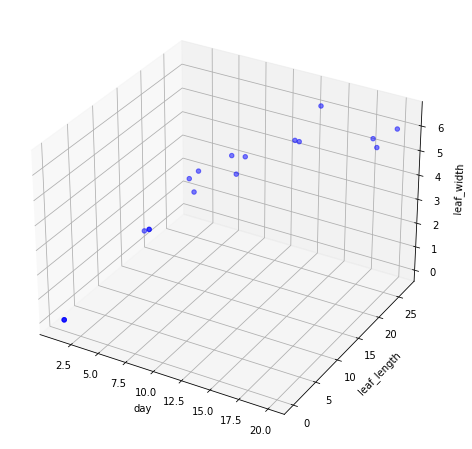

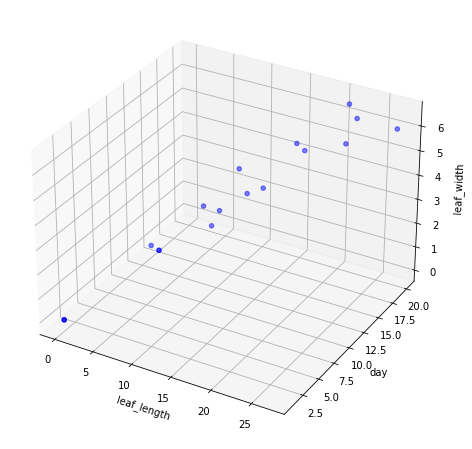

In [9]:
#1
# from mpl_toolkits.mplot3d import Axes3D

# fig=plt.figure(figsize=(12,8))

# ax = fig.add_subplot(1, 1, 1, projection="3d")
# ax.scatter(data_f['day'], data_f['leaf_length'], data_f['leaf_width'], c="blue", alpha=.5)
# ax.set(xlabel='day', ylabel='leaf_length', zlabel='leaf_width')

#2
# def plot_3d():
#     from mpl_toolkits.mplot3d import Axes3D

#     fig=plt.figure(figsize=(12,8))

#     ax = fig.add_subplot(1, 1, 1, projection="3d")
#     ax.scatter(data_f['day'], data_f['leaf_length'], data_f['leaf_width'], c="blue", alpha=.5)
#     ax.set(xlabel='day', ylabel='leaf_length', zlabel='leaf_width')
    
# plot_3d()

#3
def plot_3d(df, a, b, c):
    from mpl_toolkits.mplot3d import Axes3D

    fig=plt.figure(figsize=(12,8))

    ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.scatter(df[a], df[b], df[c], c="blue", alpha=.5)
    ax.set(xlabel=a, ylabel=b, zlabel=c)
    
plot_3d(data_f, 'day', 'leaf_length', 'leaf_width')
plot_3d(data_f, 'leaf_length', 'day', 'leaf_width')

In [10]:
# 학습용 문제, 학스용 정답, 테스트용 문제, 테스트용 정답으로 데이터를 4개로 쪼개기, split_4_parts
train, test = train_test_split(data_f, train_size = 0.8)
#train_size=는 80문제를 문제 공개고 20퍼는 공개 안함 train 80퍼 test 20퍼
#from sklearn.model_selection import train_test_split # 데이터 분할 모듈 = 이것을 사용해서 사용가능

# 학습용 문제와 정답
train_X = train[['day']] # 문제
train_y = train['height'] # 정답

#테스트용 문제와 정답
test_X = test[['day']] # 문제
test_y = test['height'] # 정답

#입력부분과 정답부분으로 day와 height로 나눔
#['height'] = .height

#실행할 때마다 새로운 데이터가 출력

In [11]:
train

,day,height,leaf_width,leaf_length,owner
5,5,12.0,2.9,8,3
13,14,44.0,5.8,20,2
11,10,31.0,5.5,15,3
17,20,51.0,6.5,21,3
16,20,50.0,6.0,22,2
3,5,16.0,2.8,9,1
12,14,50.0,6.5,25,1
0,1,0.0,0.0,0,1
15,20,56.0,6.0,27,1
10,10,30.0,4.6,16,2


In [12]:
test

,day,height,leaf_width,leaf_length,owner
9,10,35.0,5.0,18,1
7,7,26.0,3.8,14,2
1,1,0.0,0.0,0,2
8,7,25.0,4.5,13,3


In [13]:
train_X

,day
5,5
13,14
11,10
17,20
16,20
3,5
12,14
0,1
15,20
10,10


In [14]:
train_y

5     12.0
13    44.0
11    31.0
17    51.0
16    50.0
3     16.0
12    50.0
0      0.0
15    56.0
10    30.0
4     16.0
2      0.0
14    45.5
6     33.0
Name: height, dtype: float64

In [15]:
test_X

,day
9,10
7,7
1,1
8,7


In [16]:
test_y

9    35.0
7    26.0
1     0.0
8    25.0
Name: height, dtype: float64

In [17]:
#시험공부시키기, learn
gildong = DecisionTreeRegressor(random_state = 0) #인공지능 알고리즘
gildong.fit(train_X, train_y) #fit은 길동이에게 이 데이터를 몸에 맞게 학습 시켜줌

#테스트한(기말고사) 후 점수까지 계산하기, test_score
score = gildong.score(test_X, test_y) #테스트 문제, 테스트 정답 #스스로 자기가 문제와 정답 체크
print('Score:', format(score, '.3f')) # score의 의미: 정확하게 예측하면 1, 평균으로 예측하면 0, 더 못 예측하면 음
#score 리턴된 값

Score: 0.803


In [18]:
#테스트 문제지와 정답 출력해보기, show_test_data
print(test_X) #입력: 10일 후에는
print('------')
print(test_y) #정답 : 35만큼 자란다.

#위가 기말고사 문제와 정답 출력

   day
9   10
7    7
1    1
8    7
------
9    35.0
7    26.0
1     0.0
8    25.0
Name: height, dtype: float64


In [19]:
# 테스트 문제 전부 주고 테스트하기, test
#predict= 맞춰봐, 예측해봐
predicted = gildong.predict(test_X)
print('Predicted:', predicted) #predict 출력 (맞춘문제 [44.75 14.   32.5  29.  ])
print('Correct answer:\n', test_y) #정답 출력 (정답)  
# 12    50.0 정답이 50.0인데 44.75으로 문제 풀어냄
# 4     16.0
# 11    31.0
# 7     26.0

Predicted: [30.5 33.   0.  33. ]
Correct answer:
 9    35.0
7    26.0
1     0.0
8    25.0
Name: height, dtype: float64


In [20]:
#테스트 문제 몇개 주고 테스트하기
predicted = gildong.predict([[2], [11], [60]]) # 2일 11일 60일 주고 문제 맞추게하기
print(predicted)

[ 0.         30.5        52.33333333]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [21]:
#기타 다른 머신러닝 알고리즘
youngja = KNeighborsRegressor(n_neighbors=2)

cheolsu = LinearRegression()

minsu = RandomForestRegressor(n_estimators = 28, random_state = 0)